### Oct 2024: END SEMESTER ASSESSMENT (ESA) 
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935: Introduction to Deep Learning and Applications


#### Section B: Question No:2   (10 marks)
This dataset has images from 8 different classes of household garbage; battery, biological, clothes, green-glass, metal, paper, plastic and shoes.

Garbage Recycling is a key aspect of preserving our environment. To make the recycling process possible/easier, the garbage must be sorted to groups that have similar recycling process

Dataset_Folder Name: Garbage classes 
120 images are there in every train grabage class folder. 

Conditions to consider:

--Parameters should not cross 300000

--Should not use more than 4 layers (except input and output, including convolution and dense layers)

--Use Adam Optimizer


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [5]:
train_dir=r"section 2-3/garbage_classes/Train"
test_dir=r"section 2-3/garbage_classes/Test"

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=(64, 64), class_mode='categorical',
                                                                 subset='training', shuffle=True)


validation_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=(64, 64), class_mode='categorical',
                                                                 subset='validation', shuffle=True)


test_data_generator = test_image_generator.flow_from_directory(test_dir, 
                                                                 target_size=(64, 64), class_mode='categorical')

Found 768 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 240 images belonging to 8 classes.


In [11]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                

In [12]:
history = model.fit(train_data_generator, validation_data=validation_data_generator, epochs=5, )

Epoch 1/5
24/24 [==============================] - 16s 679ms/step - loss: 1.9691 - accuracy: 0.2578 - val_loss: 1.8019 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 2s 93ms/step - loss: 1.6158 - accuracy: 0.3906 - val_loss: 1.6806 - val_accuracy: 0.3698
Epoch 3/5
24/24 [==============================] - 2s 93ms/step - loss: 1.4097 - accuracy: 0.5013 - val_loss: 1.5379 - val_accuracy: 0.4375
Epoch 4/5
24/24 [==============================] - 2s 93ms/step - loss: 1.2882 - accuracy: 0.5482 - val_loss: 1.5015 - val_accuracy: 0.4688
Epoch 5/5
24/24 [==============================] - 2s 93ms/step - loss: 1.2127 - accuracy: 0.5573 - val_loss: 1.4542 - val_accuracy: 0.4688


In [17]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Model accuracy: {accuracy:.2f}')

8/8 [==============================] - 0s 36ms/step - loss: 1.3262 - accuracy: 0.5042
Model accuracy: 0.50


#### Section B: Question No:3   (20 marks)

Improve the baseline model (model build in question2) performance and save the weights of improved model

Conditions to consider:

- Apply Data Augmentation if required

- No parameter limit

- Can use any number of layers

- Use any optimizers of your choice 

- Use early stopping and save best model callbacks


In [18]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, 
                                           rotation_range=30, 
                                           width_shift_range=0.2, 
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           shear_range=0.2,
                                           horizontal_flip=True,
                                          )
test_image_generator = ImageDataGenerator(rescale=1./255)

target_size = (128, 128)
train_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, class_mode='categorical',
                                                                 subset='training', shuffle=True)


validation_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, class_mode='categorical',
                                                                 subset='validation', shuffle=True)


test_data_generator = test_image_generator.flow_from_directory(test_dir, 
                                                                 target_size=target_size, class_mode='categorical')

Found 768 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 240 images belonging to 8 classes.


In [24]:
model = Sequential()
model.add(Conv2D(200, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 126, 126, 200)     5600      
                                                                 
 batch_normalization_12 (Ba  (None, 126, 126, 200)     800       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 126, 126, 200)     0         
                                                                 
 dense_11 (Dense)            (None, 126, 126, 100)     20100     
                                                                 
 batch_normalization_13 (Ba  (None, 126, 126, 100)     400       
 tchNormalization)                                               
                                                                 
 dropout_13 (Dropout)        (None, 126, 126, 100)    

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, min_delta=0.01, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_optimized_model', save_best_only=True)

history  = model.fit(train_data_generator, validation_data=validation_data_generator, epochs=5, 
                     callbacks=[early_stop, model_checkpoint])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 28.3911 - accuracy: 0.3229INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


24/24 [==============================] - 114s 5s/step - loss: 28.3911 - accuracy: 0.3229 - val_loss: 8.2142 - val_accuracy: 0.1510
Epoch 2/5
24/24 [==============================] - 105s 4s/step - loss: 18.9445 - accuracy: 0.4128 - val_loss: 33.0120 - val_accuracy: 0.1250
Epoch 3/5
24/24 [==============================] - 104s 4s/step - loss: 18.3908 - accuracy: 0.4115 - val_loss: 25.0880 - val_accuracy: 0.1094
Epoch 4/5
24/24 [==============================] - 106s 4s/step - loss: 17.9085 - accuracy: 0.4544 - val_loss: 46.7811 - val_accuracy: 0.1302
Epoch 5/5
24/24 [==============================] - 106s 4s/step - loss: 18.7136 - accuracy: 0.4453 - val_loss: 39.9565 - val_accuracy: 0.1250


In [26]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Model accuracy after optimization : {accuracy}')

8/8 [==============================] - 5s 558ms/step - loss: 38.4754 - accuracy: 0.1833
Model accuracy after optimization : 0.18333333730697632


#### Section C: Question 4:

Use the Transfer learning technique to improve the previous section model’s classification performance. 
The pre-trained models weights are given to you. The architecture of pre-trained model till convolution layers and its corresponding weights are already saved under the folder ‘base_model’. The given model convolution layers already freezed. (Note: This pre-trained model provided is MobileNet).

Load these weights along with architecture using the following syntax:

cust_model=tf.keras.models.load_model("base_model") 

“base_model” is the folder name under all the required models files are exist. 

Design the remaining layers of network in your own way (from flattening to output layer) and train only its weights with the dataset given.


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
train_dir=r"Section 4/garbage_classes/train"
test_dir=r"Section 4/garbage_classes/test"

In [ ]:
train_files = glob.glob(train_files + '**/*', )

In [28]:
cust_model=tf.keras.models.load_model("Section 4/base_model")
cust_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [29]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, 
                                           rotation_range=30, 
                                           width_shift_range=0.2, 
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           shear_range=0.2,
                                           horizontal_flip=True,
                                           preprocessing_function=tf.keras.applications.resnet50.preprocess_input
                                          )
test_image_generator = ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

target_size = (224, 224)
train_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, class_mode='categorical',
                                                                 subset='training', shuffle=True)


validation_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, class_mode='categorical',
                                                                 subset='validation', shuffle=True)


test_data_generator = test_image_generator.flow_from_directory(test_dir, 
                                                                 target_size=target_size, class_mode='categorical')

Found 768 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 240 images belonging to 8 classes.


In [33]:
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3))
x = cust_model(inputs, training=False)
p = GlobalAveragePooling2D()(x)
outputs = Dense(8, activation='softmax')(p)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_15 (Dense)            (None, 8)                 16392     
                                                                 
Total params: 23604104 (90.04 MB)
Trainable params: 23550984 (89.84 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3, callbacks=[early_stop, model_checkpoint])


Epoch 1/3
24/24 [==============================] - ETA: 0s - loss: 5.1349 - accuracy: 0.1211INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


24/24 [==============================] - 188s 7s/step - loss: 5.1349 - accuracy: 0.1211 - val_loss: 2.1014 - val_accuracy: 0.1250
Epoch 2/3
24/24 [==============================] - ETA: 0s - loss: 2.1125 - accuracy: 0.1172INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


24/24 [==============================] - 170s 7s/step - loss: 2.1125 - accuracy: 0.1172 - val_loss: 2.0835 - val_accuracy: 0.1250
Epoch 3/3
24/24 [==============================] - ETA: 0s - loss: 2.0875 - accuracy: 0.1029INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


24/24 [==============================] - 172s 7s/step - loss: 2.0875 - accuracy: 0.1029 - val_loss: 2.0803 - val_accuracy: 0.1250


In [36]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Transfer-Learnin model accuracy: {accuracy:0.2f}')

8/8 [==============================] - 12s 1s/step - loss: 2.0803 - accuracy: 0.1250
Transfer-Learnin model accuracy: 0.12


#### Section C: Question 5:    (15 Marks)

Develop a Semantic segmentation model using Unet architecture on the given dataset.

Dataset contains the images and the corresponding masks. Find the dataset under the folder “Unet_Dataset”. 1141 Glioma tumor images and its corresponding masks are provided.

Students can make use of pre-trained Unet segmentation model using the library

import segmentation_models as sm

Hints
1. Load all the images in one array of size 1141x128x128x1
    Where 1141 is total number of trained images
    128x128x3 is each image size (You can resize to any size of your choice, but bigger images takes time)
2. Load all the masks in one array of size 1141x128x128x1
3. Scale both the above two arrays
4. Split the data into train and test
5. Define the pre-trained segmentation model. Use encoder_weight=None, If internet access is not available.
6. Properly define the classes and activation of the model.
6. Compile with appropriate loss and metric and fit the data into it.
7. Reduce the batch_size to 1 or 2, if you get any memory related error 

Run the model for minimum 2 epochs and present your result. The solution will be evaluated based on approach only as it take lot of epochs to produce good result.

In [37]:
import os
import cv2
from PIL import Image
import tensorflow as tf
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
import segmentation_models as sm

# Set environment variable for segmentation_models to use tf.keras
os.environ["SM_FRAMEWORK"] = "tf.keras"
sm.set_framework('tf.keras')
sm.framework()

# Directories
image_dir = r'section 5/Unet_Dataset/glioma_img/'
mask_dir = r'section 5/Unet_Dataset/glioma_mask/'

Segmentation Models: using `keras` framework.


In [54]:
size = 128

image_dataset= []
mask_dataset= []

images = os.listdir(image_dir)
image_ids = []
for i, image_name in enumerate(images):
    if image_name.split('.')[-1] == 'jpg':
        image_ids.append(image_name.split('_')[-1])
        image = cv2.imread(image_dir + image_name, cv2.IMREAD_GRAYSCALE)
        image = Image.fromarray(image)
        image = image.resize((size, size))
        
        image_dataset.append(np.array(image))
    
masks = os.listdir(mask_dir)

for i, mask_name in enumerate(masks):
    if mask_name.split('.')[-1] == 'jpg' and mask_name.split('_')[1] in image_ids:
        mask = cv2.imread(mask_dir + mask_name, cv2.IMREAD_GRAYSCALE)
        #mask = Image.fromarray(mask)
        mask = cv2.resize(mask, (size, size))
        (thres, bwimage) = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
        bwimage = Image.fromarray(bwimage)                                         
        mask_dataset.append(np.array(bwimage))    
    

In [55]:
image_dataset = np.array(image_dataset).astype('float32')
image_dataset = np.expand_dims(image_dataset, axis=3)
image_dataset.shape

(1141, 128, 128, 1)

In [56]:
mask_dataset = np.array(mask_dataset)
mask_dataset = np.where(mask_dataset > 0, 1, 0).astype('float32')
mask_dataset = np.expand_dims(mask_dataset, axis=3)
mask_dataset.shape

(1141, 128, 128, 1)

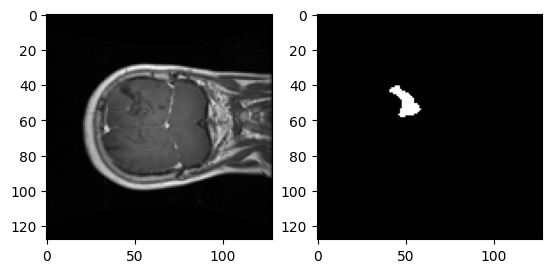

In [57]:
r1 = np.random.randint(0, 1141)

plt.subplot(1, 2, 1)
plt.imshow(image_dataset[r1, :, :, : ], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(mask_dataset[r1, :, :, : ], cmap='gray')

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.2, random_state=43)

In [63]:
backbone = 'resnet34'
preprocessing_func = sm.get_preprocessing(backbone)
x_train_processed = preprocessing_func(x_train)
x_test_processed = preprocessing_func(x_test)

In [64]:
tf.keras.backend.clear_session()

model = sm.Unet(backbone_name=backbone, encoder_weights=None, input_shape=(128, 128, 1), classes=1, activation='sigmoid')
model.compile(optimizer='adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 128, 128, 1)          3         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 1)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

                                                                                                  
 zero_padding2d_6 (ZeroPadd  (None, 34, 34, 64)           0         ['stage1_unit3_relu1[0][0]']  
 ing2D)                                                                                           
                                                                                                  
 stage1_unit3_conv1 (Conv2D  (None, 32, 32, 64)           36864     ['zero_padding2d_6[0][0]']    
 )                                                                                                
                                                                                                  
 stage1_unit3_bn2 (BatchNor  (None, 32, 32, 64)           256       ['stage1_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage1_un

                                                                                                  
 zero_padding2d_12 (ZeroPad  (None, 18, 18, 128)          0         ['stage2_unit3_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage2_unit3_conv1 (Conv2D  (None, 16, 16, 128)          147456    ['zero_padding2d_12[0][0]']   
 )                                                                                                
                                                                                                  
 stage2_unit3_bn2 (BatchNor  (None, 16, 16, 128)          512       ['stage2_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage2_un

                                                                                                  
 zero_padding2d_18 (ZeroPad  (None, 10, 10, 256)          0         ['stage3_unit2_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage3_unit2_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_18[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit2_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_un

 ding2D)                                                                                          
                                                                                                  
 stage3_unit5_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_24[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit5_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit5_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_unit5_relu2 (Activa  (None, 8, 8, 256)            0         ['stage3_unit5_bn2[0][0]']    
 tion)                                                                                            
          

 ding2D)                                                                                          
                                                                                                  
 stage4_unit2_conv1 (Conv2D  (None, 4, 4, 512)            2359296   ['zero_padding2d_30[0][0]']   
 )                                                                                                
                                                                                                  
 stage4_unit2_bn2 (BatchNor  (None, 4, 4, 512)            2048      ['stage4_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage4_unit2_relu2 (Activa  (None, 4, 4, 512)            0         ['stage4_unit2_bn2[0][0]']    
 tion)                                                                                            
          

 decoder_stage1a_conv (Conv  (None, 16, 16, 128)          442368    ['decoder_stage1_concat[0][0]'
 2D)                                                                ]                             
                                                                                                  
 decoder_stage1a_bn (BatchN  (None, 16, 16, 128)          512       ['decoder_stage1a_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage1a_relu (Acti  (None, 16, 16, 128)          0         ['decoder_stage1a_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 decoder_stage1b_conv (Conv  (None, 16, 16, 128)          147456    ['decoder_stage1a_relu[0][0]']
 2D)      

 decoder_stage4b_bn (BatchN  (None, 128, 128, 16)         64        ['decoder_stage4b_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage4b_relu (Acti  (None, 128, 128, 16)         0         ['decoder_stage4b_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 final_conv (Conv2D)         (None, 128, 128, 1)          145       ['decoder_stage4b_relu[0][0]']
                                                                                                  
 sigmoid (Activation)        (None, 128, 128, 1)          0         ['final_conv[0][0]']          
                                                                                                  
Total para

In [65]:
history = model.fit(x_train_processed, y_train, batch_size=2, epochs=10, validation_data=(x_test_processed, y_test))

Epoch 1/10
456/456 [==============================] - 241s 506ms/step - loss: 0.9796 - iou_score: 0.1349 - val_loss: 6.6417 - val_iou_score: 0.0559
Epoch 2/10
456/456 [==============================] - 232s 509ms/step - loss: 0.8416 - iou_score: 0.2451 - val_loss: 1.0649 - val_iou_score: 0.2183
Epoch 3/10
456/456 [==============================] - 226s 497ms/step - loss: 0.7907 - iou_score: 0.2917 - val_loss: 0.8358 - val_iou_score: 0.2509
Epoch 4/10
456/456 [==============================] - 227s 497ms/step - loss: 0.7571 - iou_score: 0.3217 - val_loss: 0.8799 - val_iou_score: 0.2090
Epoch 5/10
456/456 [==============================] - 226s 495ms/step - loss: 0.7081 - iou_score: 0.3663 - val_loss: 0.8218 - val_iou_score: 0.2978
Epoch 6/10
456/456 [==============================] - 227s 497ms/step - loss: 0.6925 - iou_score: 0.3786 - val_loss: 0.6624 - val_iou_score: 0.4059
Epoch 7/10
456/456 [==============================] - 226s 496ms/step - loss: 0.6731 - iou_score: 0.3973 - val_l

In [72]:
n1 = np.random.randint(0, len(x_test))

test_image = x_test_processed[n1]
test_image = np.expand_dims(test_image, axis=0)

predicted_mask = model.predict(test_image)
print(predicted_mask.shape)
predicted_mask = (predicted_mask[0, :, :, 0] > 0.5).astype(np.uint8)
print(predicted_mask)

1/1 [==============================] - 0s 78ms/step
(1, 128, 128, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


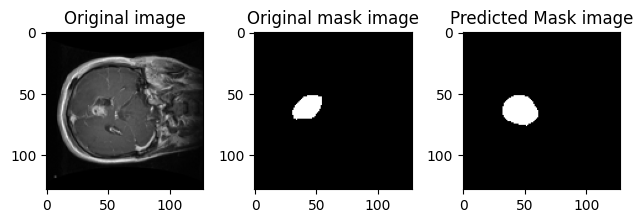

In [73]:
plt.subplot(1, 3, 1)
plt.title('Original image')
plt.imshow(x_test_processed[n1, : , :], cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Original mask image')
plt.imshow(y_test[n1, : , :], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask image')
plt.imshow(predicted_mask, cmap='gray')

plt.tight_layout()
plt.show()